In [1]:
from make_dataset import *

In [2]:
import classyRF

In [17]:
import importlib
importlib.reload(make_dataset)
#importlib.reload(classyRF)

NameError: name 'make_dataset' is not defined

In [3]:
createJointDataset()

37874 massgap events after FAR cut
Adding  26512  samples in the mass gap to training
Adding  11362  samples in the mass gap to testing
----Training dataset----
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 138337, 1: 28174}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 22246, 1: 28174, 2: 116091}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 22246, 1: 28174, 2: 75226, 3: 40865}
----Testing dataset----
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 59289, 1: 12072}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 9453, 1: 12072, 2: 49836}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 9453, 1: 12072, 2: 32257, 3: 17579}


In [3]:
createDatasetFromOriginal()

37874 massgap events after FAR cut
Adding  26512  samples in the mass gap to training
Adding  11362  samples in the mass gap to testing
203398 O2 events after FAR cut
Adding  142379  samples in O2 to training
Adding  61019  samples in O2 to testing
----Training dataset----
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 133562, 1: 35329}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 22532, 1: 35329, 2: 111030}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 22532, 1: 35329, 3: 41544, 5: 69486}
----Testing dataset----
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 57260, 1: 15121}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 9700, 1: 15121, 2: 47560}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 9700, 1: 15121, 3: 17881, 5: 29679}


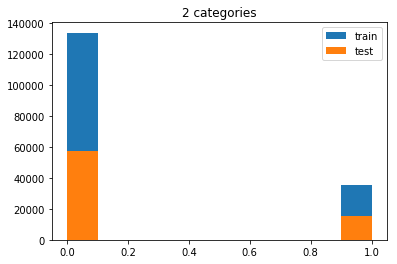

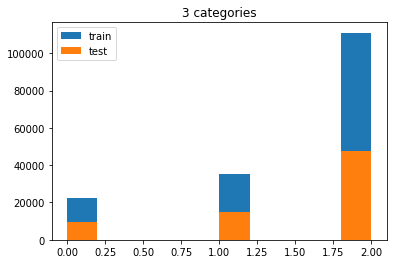

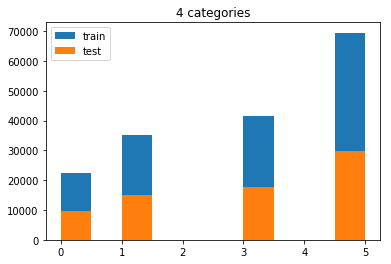

In [5]:
plt.title("2 categories")
plt.hist(readfile(pathHere+'o_train_2cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'o_test_2cat.csv')[:,-1], label='test')
plt.legend()
plt.show()

plt.title("3 categories")
plt.hist(readfile(pathHere+'o_train_3cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'o_test_3cat.csv')[:,-1], label='test')
plt.legend()
plt.show()


plt.title("4 categories")
plt.hist(readfile(pathHere+'o_train_4cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'o_test_4cat.csv')[:,-1], label='test')
plt.legend()
plt.show()


All approaches are unbalanced

## Other types of score
As the events in different categories are not balanced, the score can be misleading. We therefore use other metrics:

**Sensitivity**: tp/(tp+fn). Measures how much the model says YES when it is YES, even if we say YES to some events that are NO.

**Precision**: tp/(tp+fp). How much we can trust the model when it says YES. Never say YES when it is NO.

**F1 score**: a combination of the previous two, which balance them. The best case scenario is value = 1.

These will be taken with threshold=0.5 (they will be used as first check to see if the method worths more time)

# 2 categories

50 trees, max_depth=15
Score on testing:  0.9035520371368176
******Confusion matrix******


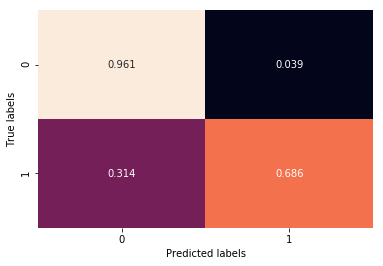

Sensitivity  0.6862641359698433
Precision  0.8226573648327256
F1 score  0.7482963764196863
---------------------------
50 trees, max_depth=None
Score on testing:  0.899048092731518
******Confusion matrix******


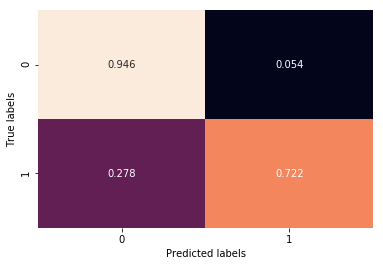

Sensitivity  0.7221744593611533
Precision  0.7785541137886781
F1 score  0.7493052458228977
---------------------------
100 trees, max_depth=15
Score on testing:  0.9048092731517939
******Confusion matrix******


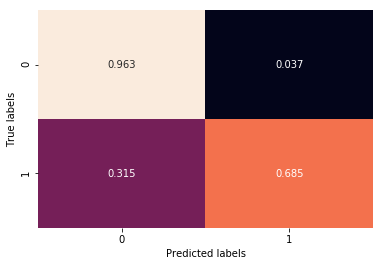

Sensitivity  0.6851398717016071
Precision  0.8295299863880214
F1 score  0.7504527345164795
---------------------------
100 trees, max_depth=None
Score on testing:  0.8984263826142219
******Confusion matrix******


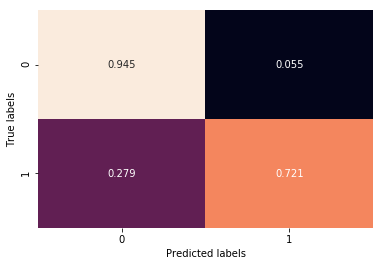

Sensitivity  0.7207856623239204
Precision  0.7768907263525555
F1 score  0.74778730703259


<Figure size 432x288 with 0 Axes>

In [6]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='o_train_2cat.csv')
RF.load_test_dataset(pathHere, fname_x='o_test_2cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Results are very bad. The best value is for 50 trees, unlimited depth

# 3 categories

50 trees, max_depth=15
Score on testing:  0.9054033517083212
******Confusion matrix******


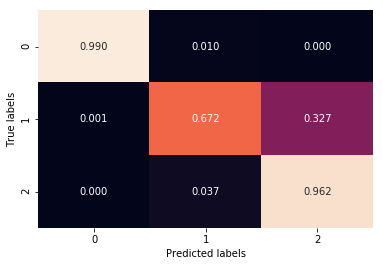

Sensitivity  0.6715825672905231
Precision  0.8437889488990444
F1 score  0.7479010163499779
---------------------------
50 trees, max_depth=None
Score on testing:  0.8979566460811539
******Confusion matrix******


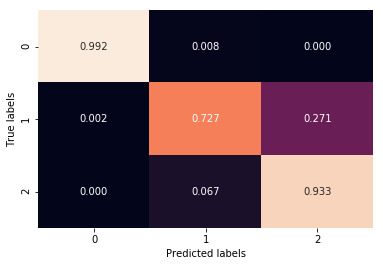

Sensitivity  0.7272667151643409
Precision  0.7712862954131015
F1 score  0.7486299737908031
---------------------------
100 trees, max_depth=15
Score on testing:  0.9058454566806206
******Confusion matrix******


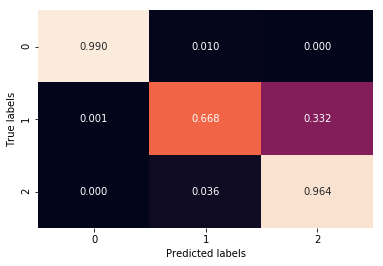

Sensitivity  0.6675484425633226
Precision  0.8495917852032656
F1 score  0.7476483223464928
---------------------------
100 trees, max_depth=None
Score on testing:  0.8987717771238308
******Confusion matrix******


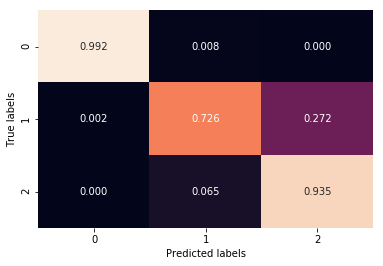

Sensitivity  0.7263408504728524
Precision  0.7749788314987298
F1 score  0.749871983067627


<Figure size 432x288 with 0 Axes>

In [7]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='o_train_3cat.csv')
RF.load_test_dataset(pathHere, fname_x='o_test_3cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: 50 trees no max depth. Still not very good results

# 4 categories

50 trees, max_depth=15
Score on testing:  0.8901092828228403
******Confusion matrix******


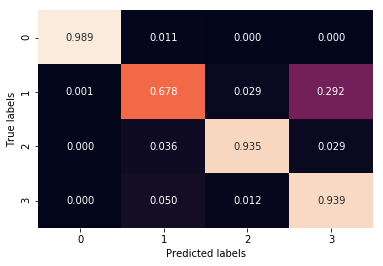

Sensitivity  0.6782620197076912
Precision  0.8218607260197132
F1 score  0.7431884057971013
---------------------------
50 trees, max_depth=None
Score on testing:  0.8826487614152886
******Confusion matrix******


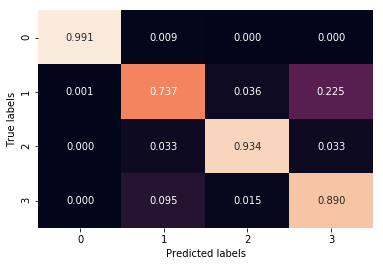

Sensitivity  0.7373189603862179
Precision  0.761803894772805
F1 score  0.749361473316306
---------------------------
100 trees, max_depth=15
Score on testing:  0.8915599397631975
******Confusion matrix******


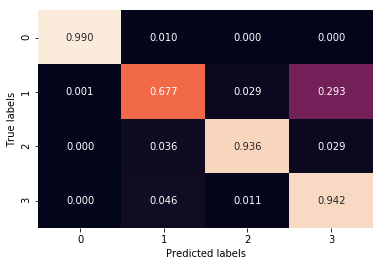

Sensitivity  0.6770054890549567
Precision  0.8287726683937824
F1 score  0.7452407818585519
---------------------------
100 trees, max_depth=None
Score on testing:  0.8829250770229756
******Confusion matrix******


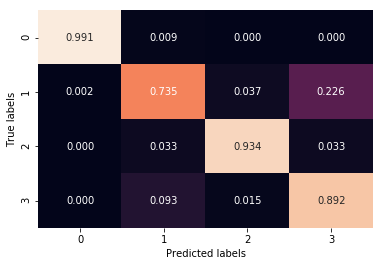

Sensitivity  0.7352026982342438
Precision  0.7645804676753782
F1 score  0.7496038569164897


<Figure size 432x288 with 0 Axes>

In [8]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='o_train_4cat.csv')
RF.load_test_dataset(pathHere, fname_x='o_test_4cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: best results so far, the percentage of massgap events classified correctly is bigger. Better results are with no limited depth, 50 trees

## Plot de data (mass gap recovered values)

In [9]:
data = readfile(filename=pathHere + 'o_train_2cat.csv')
indexes=np.where(data[:,-1]==1)[0]

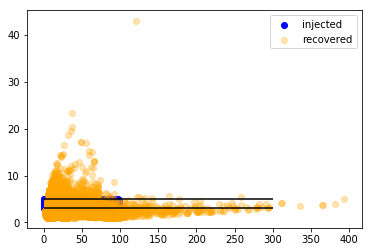

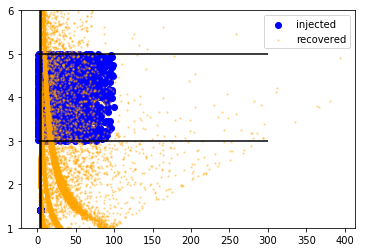

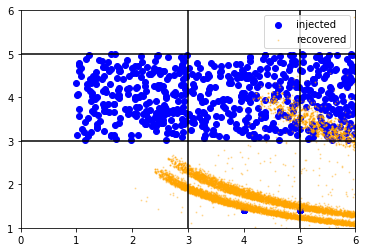

In [10]:
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',alpha=0.3)
plt.legend()
plt.show()

plt.ylim(1,6)
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.vlines(3,0,6)
plt.vlines(5,0,6)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',s=2, alpha=0.3)
plt.legend()
plt.show()

plt.ylim(1,6)
plt.xlim(0,6)
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.vlines(3,0,6)
plt.vlines(5,0,6)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',s=1, alpha=0.3)
plt.legend()

# Comparison of better trees for 2, 3 and 4 categories

CRITERION: GINI
2 categories: 50 trees, max_depth=None
2 cat
Score on testing:  0.899048092731518
******Confusion matrix******


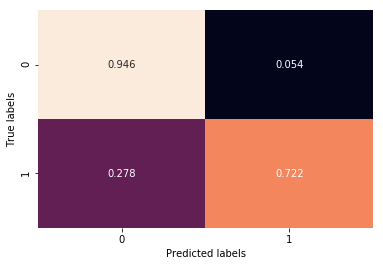

Sensitivity  0.7221744593611533
Precision  0.7785541137886781
F1 score  0.7493052458228977
3 categories: 50 trees, max_depth=None
3 cat
Score on testing:  0.8979566460811539
******Confusion matrix******


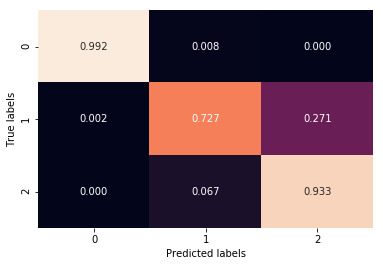

Sensitivity  0.7272667151643409
Precision  0.7712862954131015
F1 score  0.7486299737908031
4 categories: 50 trees, max_depth=None
4 cat
Score on testing:  0.8826487614152886
******Confusion matrix******


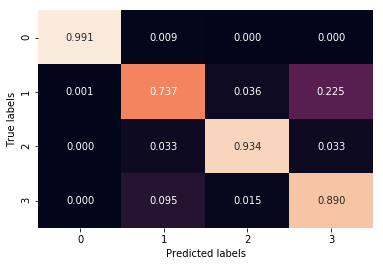

Sensitivity  0.7373189603862179
Precision  0.761803894772805
F1 score  0.749361473316306
CRITERION: ENTROPY
2 categories: 50 trees, max_depth=None
2 cat
Score on testing:  0.8986336193199873
******Confusion matrix******


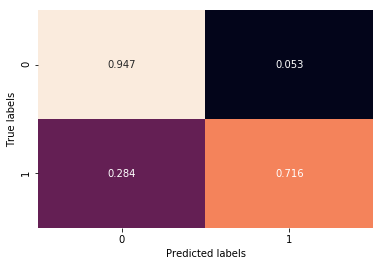

Sensitivity  0.7157595397129819
Precision  0.7807675660077911
F1 score  0.7468516026636304
3 categories: 50 trees, max_depth=None
3 cat
Score on testing:  0.8978323040576947
******Confusion matrix******


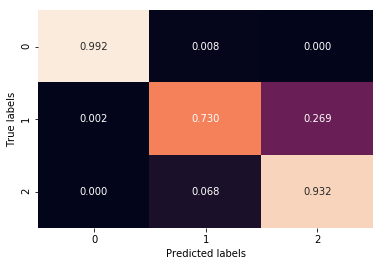

Sensitivity  0.7297797764698102
Precision  0.7693648469636757
F1 score  0.7490496877545479
4 categories: 50 trees, max_depth=None
4 cat
Score on testing:  0.882275735344911
******Confusion matrix******


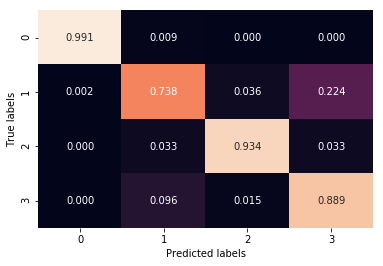

Sensitivity  0.7377818927319622
Precision  0.7605153725543663
F1 score  0.748976166498825


<Figure size 432x288 with 0 Axes>

In [11]:
print('CRITERION: GINI')
print("2 categories: 50 trees, max_depth=None")
RF2 = classyRF.ClassificationRF()
RF2.load_train_dataset(pathHere, fname_x='o_train_2cat.csv')
RF2.load_test_dataset(pathHere, fname_x='o_test_2cat.csv')
RF2.Nfeatures = 5
RF2.data_train=RF2.data_train_all[:,2:7]
RF2.data_test=RF2.data_test_all[:,2:7]
print("2 cat")
RF2.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF2.print_metrics(pathHere)
otherscores(RF2)

print("3 categories: 50 trees, max_depth=None")
RF3 = classyRF.ClassificationRF()
RF3.load_train_dataset(pathHere, fname_x='o_train_3cat.csv')
RF3.load_test_dataset(pathHere, fname_x='o_test_3cat.csv')
RF3.Nfeatures = 5
RF3.data_train=RF3.data_train_all[:,2:7]
RF3.data_test=RF3.data_test_all[:,2:7]
print("3 cat")
RF3.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF3.print_metrics(pathHere)
otherscores(RF3)

print("4 categories: 50 trees, max_depth=None")
RF4 = classyRF.ClassificationRF()
RF4.load_train_dataset(pathHere, fname_x='o_train_4cat.csv')
RF4.load_test_dataset(pathHere, fname_x='o_test_4cat.csv')
RF4.Nfeatures = 5
RF4.data_train=RF4.data_train_all[:,2:7]
RF4.data_test=RF4.data_test_all[:,2:7]
print("4 cat")
RF4.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF4.print_metrics(pathHere)
otherscores(RF4)

print('CRITERION: ENTROPY')
print("2 categories: 50 trees, max_depth=None")
RF2 = classyRF.ClassificationRF()
RF2.load_train_dataset(pathHere, fname_x='o_train_2cat.csv')
RF2.load_test_dataset(pathHere, fname_x='o_test_2cat.csv')
RF2.Nfeatures = 5
RF2.data_train=RF2.data_train_all[:,2:7]
RF2.data_test=RF2.data_test_all[:,2:7]
print("2 cat")
RF2.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=None)
RF2.print_metrics(pathHere)
otherscores(RF2)

print("3 categories: 50 trees, max_depth=None")
RF3 = classyRF.ClassificationRF()
RF3.load_train_dataset(pathHere, fname_x='o_train_3cat.csv')
RF3.load_test_dataset(pathHere, fname_x='o_test_3cat.csv')
RF3.Nfeatures = 5
RF3.data_train=RF3.data_train_all[:,2:7]
RF3.data_test=RF3.data_test_all[:,2:7]
print("3 cat")
RF3.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=None)
RF3.print_metrics(pathHere)
otherscores(RF3)

print("4 categories: 50 trees, max_depth=None")
RF4 = classyRF.ClassificationRF()
RF4.load_train_dataset(pathHere, fname_x='o_train_4cat.csv')
RF4.load_test_dataset(pathHere, fname_x='o_test_4cat.csv')
RF4.Nfeatures = 5
RF4.data_train=RF4.data_train_all[:,2:7]
RF4.data_test=RF4.data_test_all[:,2:7]
print("4 cat")
RF4.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=None)
RF4.print_metrics(pathHere)
otherscores(RF4)

We see a bit more accuracy on being in mass gap using 4 categories. Gini and entropy criterion are very similar. Entropy is a bit better for 3 and 4 categories

In [12]:
RF2 = classyRF.ClassificationRF()
RF2.load_train_dataset(pathHere, fname_x='o_train_2cat.csv')
RF2.load_test_dataset(pathHere, fname_x='o_test_2cat.csv')
RF2.Nfeatures = 5
RF2.data_train=RF2.data_train_all[:,2:7]
RF2.data_test=RF2.data_test_all[:,2:7]
RF2.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF2.saveModel(path=pathHere,filename='o_RF2_gini_50t_15d')

RF3 = classyRF.ClassificationRF()
RF3.load_train_dataset(pathHere, fname_x='o_train_3cat.csv')
RF3.load_test_dataset(pathHere, fname_x='o_test_3cat.csv')
RF3.Nfeatures = 5
RF3.data_train=RF3.data_train_all[:,2:7]
RF3.data_test=RF3.data_test_all[:,2:7]
RF3.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=None)
RF3.saveModel(path=pathHere,filename='o_RF3_entropy_100t_15d')

RF4 = classyRF.ClassificationRF()
RF4.load_train_dataset(pathHere, fname_x='o_train_4cat.csv')
RF4.load_test_dataset(pathHere, fname_x='o_test_4cat.csv')
RF4.Nfeatures = 5
RF4.data_train=RF4.data_train_all[:,2:7]
RF4.data_test=RF4.data_test_all[:,2:7]
RF4.train(trees=50, criterion='entropy', max_features='sqrt', max_depth=None)
RF4.saveModel(path=pathHere,filename='o_RF4_entropy_50t_Noned')

RF2 is 88MB;    RF3 is 94MB;    RF4 is 118MB

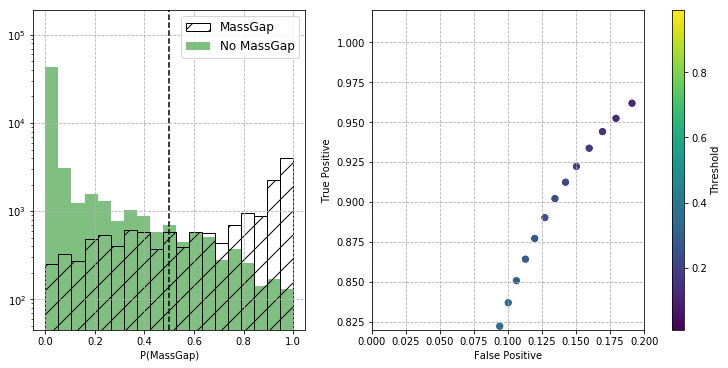

In [13]:
hist_ROC_MassGap(RF2,'')

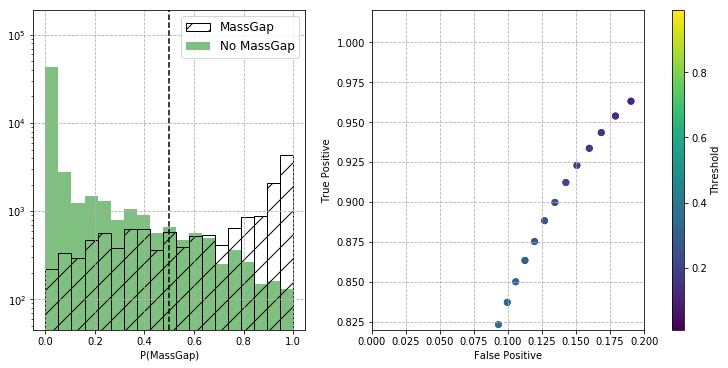

In [14]:
hist_ROC_MassGap(RF3,'')

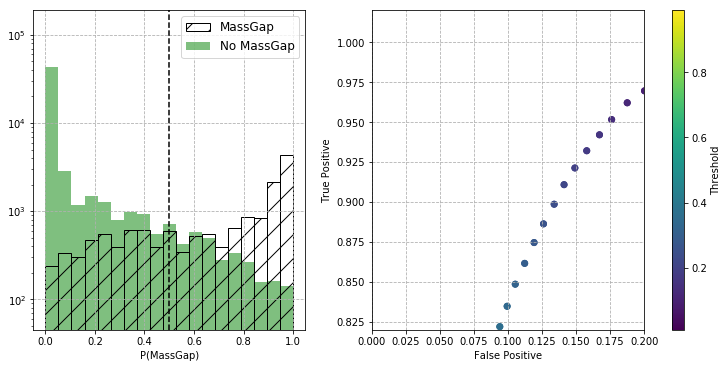

In [15]:
hist_ROC_MassGap(RF4,'')

pretty bad. 4 categories is the best